# 导入库，导入数据集

In [1]:
# 导入TensorFlow和tf.keras
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
# 导入辅助库
import numpy as np
import matplotlib.pyplot as plt


## 下载，导入数据

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 探索数据
训练数据有6000张，是28 * 28 大小的图片，对应的标签是6000，每个标签都是0到9之间的整数

In [3]:
print(x_train.shape)
print("train size:", len(x_train))
print("label size:", len(y_train))
print("label :", y_train)

(60000, 28, 28)
train size: 60000
label size: 60000
label : [5 0 4 ... 5 6 8]


## 拿一张图片看看范围
将看到像素值落在0到255的范围内

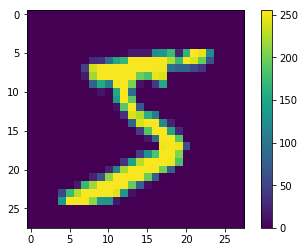

In [10]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
x_train = x_train/255.0
x_test = x_test/255.0
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

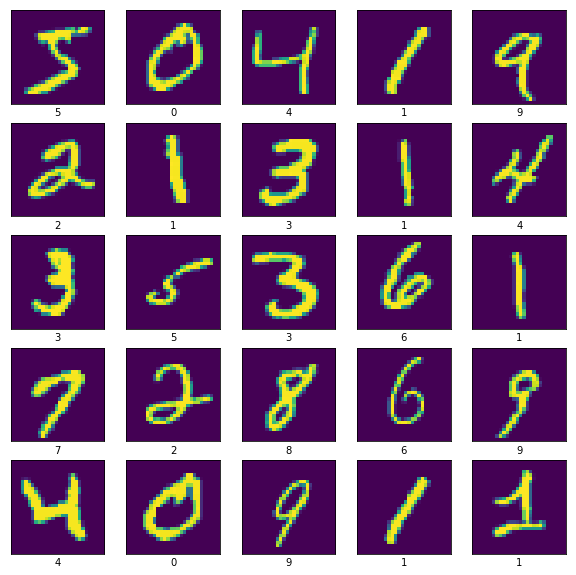

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

# 训练
## 定义模型

In [13]:
model = keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(500, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [14]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________


## 开始训练

In [15]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================]60000/60000 [==============================] - 11s 181us/step - loss: 0.2047 - acc: 0.9396

Epoch 2/5
60000/60000 [==============================]60000/60000 [==============================] - 11s 176us/step - loss: 0.0807 - acc: 0.9752

Epoch 3/5
60000/60000 [==============================]60000/60000 [==============================] - 10s 172us/step - loss: 0.0525 - acc: 0.9842

Epoch 4/5
60000/60000 [==============================]60000/60000 [==============================] - 10s 170us/step - loss: 0.0367 - acc: 0.9884

Epoch 5/5
60000/60000 [==============================]60000/60000 [==============================] - 11s 181us/step - loss: 0.0273 - acc: 0.9912



## 在测试集上评估

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_loss, test_acc

10000/10000 [==============================]10000/10000 [==============================] - 1s 59us/step



(0.06628180502113537, 0.981)

# 测试下所有图片
看看一个结果，数组里是对所有类别的置信度

In [18]:
predictions = model.predict(x_test)
predictions[0]

array([2.3129665e-09, 2.0164961e-10, 1.5185343e-06, 2.1348085e-06,
       6.1285718e-15, 2.1870425e-09, 5.5478263e-14, 9.9999630e-01,
       4.1301011e-09, 5.0929490e-08], dtype=float32)

## 定义一些作图方法

In [19]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')



## 第0个图像，预测和预测数组

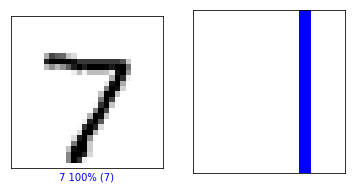

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

### 绘制几个图像及其预测结果。正确的预测标签是蓝色的，不正确的预测标签是红色的。该数字给出了预测标签的百分比(满分100)。即使非常自信，也可能出错。

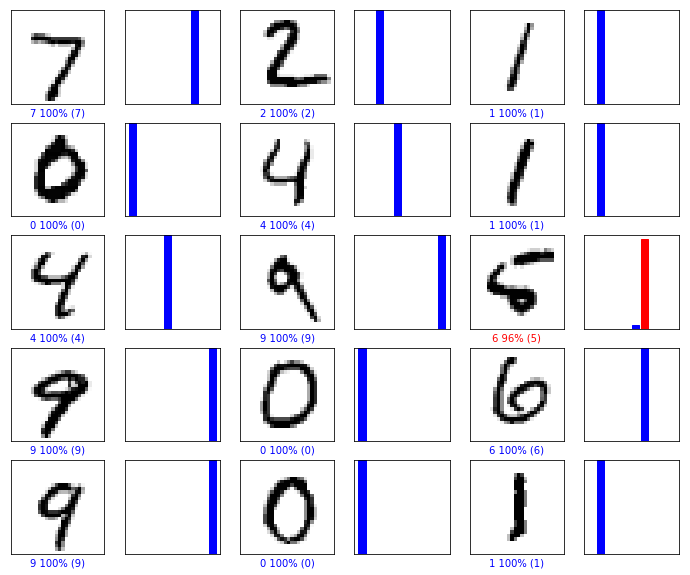

In [26]:
# 绘制前X个测试图像，预测标签和真实标签
# 以蓝色显示正确的预测，红色显示不正确的预测
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

# 拿一张图片测试下

(28, 28)
(1, 28, 28)


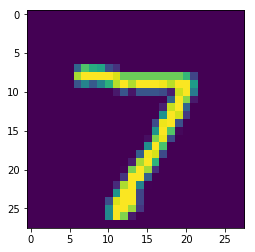

In [27]:
# 从测试数据集中获取图像
img = x_test[0]
print(img.shape)
# 将图像添加到批次中，即使它是唯一的成员。
img = (np.expand_dims(img,0))
print(img.shape)

plt.figure()
plt.imshow(x_test[0])
plt.show()

In [28]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.3129665e-09 2.0164923e-10 1.5185343e-06 2.1348085e-06 6.1285718e-15
  2.1870383e-09 5.5478371e-14 9.9999630e-01 4.1300936e-09 5.0929494e-08]]


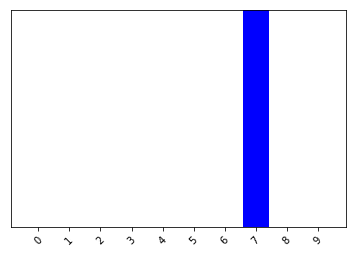

In [29]:
plot_value_array(0, predictions_single, y_test)
plt.xticks(range(10), class_names, rotation=45)
plt.show()